# Detecting rooftop available surface for installing PV modules in aerial images using Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import torch
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader

from model.unet import *
from loss.loss import *
from process_data.data_loader import *
from hyperparameters.select_param import *

%load_ext autoreload
%autoreload 2

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loading the Data Set
First we load the data set that we will use for training. Each sample is an image with its mask (label). An image is represented as a 3x250x250 array with each of the 3 color chanel being 250x250 pixels. The asssociated mask is a 250x250 array, 

In [3]:
folder_path_image = 'data/image'
folder_path_mask  = 'data/mask'

train_dataset = DataLoaderSegmentation(folder_path_image,folder_path_mask)
train_loader = DataLoader(train_dataset,batch_size=5, shuffle=True,num_workers=2)

# Initiate the model
In this report, we will use the Unet model presented in medical image segmentation, and in the previous papers of the Professor.

In [4]:
model = UNet(3,1,False).to(device)
print(model)

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2

# Loss & Optimizer

In [251]:
loss_function = torch.nn.BCEWithLogitsLoss(pos_weight=torch.FloatTensor([5]).cuda())
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Training Loop

Maybe we could write this lines in a function

In [252]:
num_epochs = 30
model = UNet(3,1,False).to(device)

trained_model = training_model(train_loader,loss_function,optimizer,model,num_epochs)

Epoch n. 0 Loss 1.204
Epoch n. 1 Loss 1.2039
Epoch n. 2 Loss 1.204
Epoch n. 3 Loss 1.2038
Epoch n. 4 Loss 1.2041
Epoch n. 5 Loss 1.204
Epoch n. 6 Loss 1.2037


KeyboardInterrupt: 

# Example of prediction
to re write more clearly

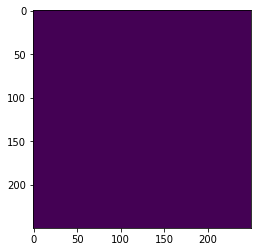

In [20]:
for i, (images,labels) in enumerate(train_loader):
    if i==10:
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        ypred = model(images)
        #ypred[ypred <= 0.20] = 0
        #ypred[ypred > 0.20] = 1
plt.imshow(np.around(ypred[0].cpu().detach().numpy()[0]))

# Export trained model

In [ ]:
torch.save(model.state_dict(), 'model/trained_model.pt')

# Cross Validation

In [48]:
loss_function = torch.nn.BCEWithLogitsLoss()
input_model = UNet(3,1,False).to(device)
num_epochs = 2
lr = 0.01

iou_, acc_ = cross_validation(train_dataset, loss_function, input_model, num_epochs, lr)

Epoch n. 0 Loss 0.83
Epoch n. 1 Loss 0.7447
Iter 0: IoU = 0.0 /  Accuracy = 0.8391
Epoch n. 0 Loss 0.6307
Epoch n. 1 Loss 0.7163
Iter 1: IoU = 0.0 /  Accuracy = 0.8373

Average test IoU: 0.000000
Variance test IoU: 0.000000

Average test accuracy: 0.838194
Variance test accuracy: 0.000001


# Tuning the hyper parameters
- Learning rate for SGD

In [145]:
lr_candidates = np.logspace(-1,-2,num=5)
num_epochs = 70
loss_function = torch.nn.BCEWithLogitsLoss(pos_weight=torch.FloatTensor([5]).cuda())

input_model = UNet(3,1,False).to(device)

best_lr, best_model = select_hyper_param(train_dataset,loss_function,input_model,num_epochs,lr_candidates)
torch.save(best_model.state_dict(), 'model/best_model.pt')

---------------------------------------------------------------------

Learning Rate = 0.1

Epoch n. 0 Loss 1.9601
Epoch n. 1 Loss 1.0283
Epoch n. 2 Loss 0.9367
Epoch n. 3 Loss 2.8764
Epoch n. 4 Loss 0.8421
Epoch n. 5 Loss 1.0272
Epoch n. 6 Loss 0.9261
Epoch n. 7 Loss 0.8048
Epoch n. 8 Loss 0.9534
Epoch n. 9 Loss 0.9605
Epoch n. 10 Loss 0.8289
Epoch n. 11 Loss 0.9441
Epoch n. 12 Loss 0.8514
Epoch n. 13 Loss 1.0312
Epoch n. 14 Loss 0.9377
Epoch n. 15 Loss 1.7566
Epoch n. 16 Loss 0.7979
Epoch n. 17 Loss 0.8598
Epoch n. 18 Loss 0.9894
Epoch n. 19 Loss 0.8233
Epoch n. 20 Loss 0.9182
Epoch n. 21 Loss 0.8337
Epoch n. 22 Loss 0.8345
Epoch n. 23 Loss 0.9435
Epoch n. 24 Loss 0.8318
Epoch n. 25 Loss 0.9021
Epoch n. 26 Loss 0.9106
Epoch n. 27 Loss 0.8976
Epoch n. 28 Loss 0.8886
Epoch n. 29 Loss 0.7652
Epoch n. 30 Loss 0.8139
Epoch n. 31 Loss 0.9682
Epoch n. 32 Loss 0.9013
Epoch n. 33 Loss 0.7991
Epoch n. 34 Loss 0.858
Epoch n. 35 Loss 0.8831
Epoch n. 36 Loss 0.8012
Epoch n. 37 Loss 0.8252
Epoch n

In [276]:
model = best_model

In [146]:
best_lr

0.01

# Useful

### Display a image with its mask

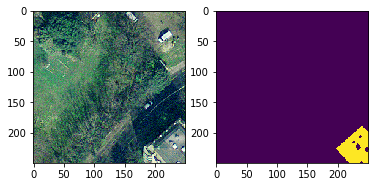

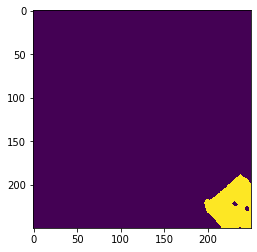

In [499]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

index_random_sample = int(np.random.random()*len(train_loader.dataset))
(x,y) = train_loader.dataset[index_random_sample]
ax1.imshow(np.transpose(x.numpy(),(1,2,0)))

ax2.imshow(y)
plt.show()


ypred = torch.squeeze(model(torch.unsqueeze(x,0).cuda())).cpu().detach().numpy()
plt.imshow(np.around(ypred))

plt.show()


In [500]:
iou(np.around(ypred),y.numpy())

0.9030680302356603